In [50]:
#with open('../quint/data/sample_texts/joe_rogan_tr.txt') as f:
with open('../quint/data/results/Joe_cut.txt') as f:
    doc = f.readlines()
    
doc = doc[0].replace("?", ". ")
sentences = doc.split('. ') 


In [31]:
from nltk.corpus import stopwords 
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize 

def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized

In [32]:
dataset = [clean(each) for each in sentences]

In [33]:
from gensim import corpora 

id2word = corpora.Dictionary(dataset) 
corpus = [id2word.doc2bow(text) for text in dataset] 

In [42]:
import gensim
num_topics = 25 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word, 
                                           num_topics=num_topics,  
                                       	   alpha='auto') 
topics = lda_model.print_topics(num_words = 5)  
for topic in topics:  
	print(topic) 


(5, '0.032*"guy" + 0.032*"instead" + 0.032*"say" + 0.032*"want" + 0.032*"criticism"')
(23, '0.054*"even" + 0.054*"know" + 0.028*"act" + 0.028*"requirement" + 0.028*"completely"')
(18, '0.028*"government" + 0.022*"capability" + 0.022*"yes" + 0.022*"sort" + 0.022*"person"')
(1, '0.044*"would" + 0.022*"clickbait" + 0.022*"thought" + 0.022*"twitter" + 0.022*"mention"')
(8, '0.041*"eight" + 0.041*"wanted" + 0.021*"lassie" + 0.021*"clarify" + 0.021*"congress"')
(13, '0.029*"book" + 0.026*"story" + 0.026*"make" + 0.015*"permanent" + 0.015*"came"')
(4, '0.053*"know" + 0.044*"terrorist" + 0.030*"using" + 0.030*"getting" + 0.017*"guy"')
(21, '0.038*"talking" + 0.038*"got" + 0.026*"government" + 0.019*"tell" + 0.019*"table"')
(16, '0.033*"surveillance" + 0.033*"program" + 0.020*"actually" + 0.017*"like" + 0.017*"obvious"')
(12, '0.028*"talk" + 0.020*"university" + 0.020*"joe" + 0.020*"channel" + 0.020*"full"')
(7, '0.039*"okay" + 0.039*"got" + 0.039*"know" + 0.039*"book" + 0.020*"n"')
(11, '0.035

In [69]:
import pandas as pd 
from tqdm import tqdm 
from gensim import models, corpora 
#from ggplot import * 
%matplotlib inline 
from gensim.models.coherencemodel import CoherenceModel
def lda(corpus,id2word,dataset,topic_num): 
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                       	id2word=id2word,
                                        num_topics=topic_num,  
                                        random_state=100, 
                                        update_every=0, 
                                        chunksize=300, 
                                       	passes=10, 
                                       	alpha='auto', 
                                        per_word_topics=True) 
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=id2word, coherence='c_v') 
    coherence_lda = coherence_model_lda.get_coherence() 
    topics = lda_model.print_topics(-1) 
    return coherence_lda, topics, lda_model 

def find_topics(start, end, dataset): 
    id2word = corpora.Dictionary(dataset) 
    corpus = [id2word.doc2bow(text) for text in dataset] 
    coherence_array = [] 
    topics_array = [] 
    topic_range = range(start,end) 
    lda_model_array = [] 

    for topic_num in tqdm(topic_range): 
        coherence_lda, topics, lda_model = lda(corpus,id2word,dataset,topic_num) 
        topics_array.append(topics) 
        coherence_array.append(coherence_lda) 
        lda_model_array.append(lda_model) 

    return {'coherence_array': coherence_array, 'topics_array': topics_array, 'lda_model_array':lda_model_array, 'corpus':corpus, 'id2word':id2word, 'topic_range':topic_range} 

results = find_topics(1,100,dataset) 
coherence_plot_pd = pd.DataFrame({'y_data': results['coherence_array'], 'x_data': results['topic_range']}) 

  4%|▍         | 4/99 [00:02<01:00,  1.58it/s]/home/poloniki/.pyenv/versions/3.8.12/envs/quint/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/home/poloniki/.pyenv/versions/3.8.12/envs/quint/lib/python3.8/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
100%|██████████| 99/99 [03:27<00:00,  2.10s/it]


<AxesSubplot:xlabel='x_data', ylabel='y_data'>

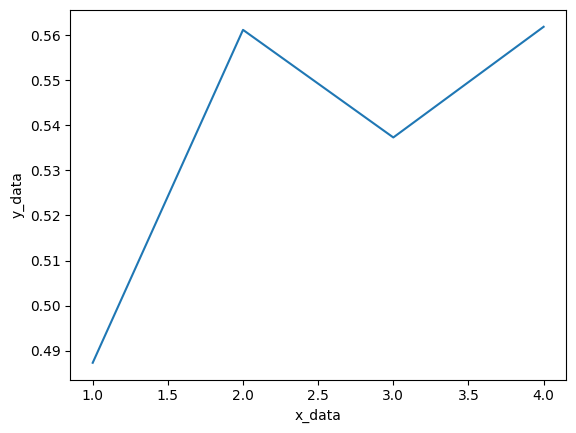

In [70]:
import seaborn as sns
sns.lineplot(data=coherence_plot_pd, x='x_data', y='y_data')

In [71]:
coherence_plot_pd#.y_data.plot()

,y_data,x_data
0,0.487338,1
1,0.561168,2
2,0.537306,3
3,0.561851,4
4,NaN,5
...,...,...
94,NaN,95
95,NaN,96
96,NaN,97
97,NaN,98


In [72]:
lda(corpus,id2word,dataset,4)

(0.5618506846812511,
 [(0,
   '0.021*"know" + 0.013*"like" + 0.013*"state" + 0.013*"united" + 0.012*"right" + 0.010*"terrorist" + 0.009*"search" + 0.009*"box" + 0.008*"want" + 0.008*"get"'),
  (1,
   '0.027*"like" + 0.025*"government" + 0.021*"book" + 0.020*"know" + 0.015*"get" + 0.011*"talking" + 0.009*"wanted" + 0.008*"want" + 0.007*"sort" + 0.007*"getting"'),
  (2,
   '0.029*"know" + 0.024*"like" + 0.022*"right" + 0.019*"thing" + 0.015*"government" + 0.014*"could" + 0.012*"everybody" + 0.011*"get" + 0.010*"got" + 0.008*"sort"'),
  (3,
   '0.026*"like" + 0.018*"know" + 0.017*"thing" + 0.015*"people" + 0.015*"guy" + 0.014*"want" + 0.014*"joe" + 0.014*"rogan" + 0.012*"say" + 0.010*"go"')],
 <gensim.models.ldamodel.LdaModel at 0x7f938c71c940>)